In [1]:
import re, os
import math
import random
import matplotlib.pyplot as PLT

In [2]:
class Person:
    
    now_position       = 0
    Umbrella_in_office = 0
    Umbrella_at_home   = 0
    numForgotRate        = 0
    numCondition       = 0 
    numPositions       = 0
    ifReturnNeed       = False
    ifRain             = False
    ifHaveUmbrella     = True
    
    def __init__(self, numUmbrella=1, numPositions=2, numForgotRate=0.5):
        
        self.now_position       = 0
        self.numPositions       = numPositions
        self.Umbrella_in_office = int(numUmbrella/2)
        self.Umbrella_at_home   = int(numUmbrella/2)
        self.numForgotRate      = 0.5
        self.ifReturnNeed       = False
        self.ifRain             = False
        self.ifHaveUmbrella     = True
        
    def Take_Umbrella(self):
        if self.now_position == 0:
            self.Umbrella_at_home   -= 1
            self.Umbrella_in_office += 1
        if self.now_position == 1:
            self.Umbrella_in_office -= 1
            self.Umbrella_at_home   += 1
        self.ifReturnNeed = True

    def Check_Umbrella(self):
        if self.now_position == 0:
            self.ifHaveUmbrella = ( self.Umbrella_at_home > 0 )
        if self.now_position == 1:
            self.ifHaveUmbrella = ( self.Umbrella_in_office > 0 )
        
    def Return_Umbrella(self):
        numRandIn = random.random()
        if self.ifReturnNeed:
            if numRandIn < self.numForgotRate :
                if self.now_position == 0:
                    self.Umbrella_at_home   -= 1
                    self.Umbrella_in_office += 1
                
                if self.now_position == 1:
                    self.Umbrella_in_office -= 1
                    self.Umbrella_at_home   += 1
                
    def MovingSequentially(self):
        self.now_position += 1
        if self.now_position >= self.numPositions:
            self.now_position = 0
            

In [3]:
class Environment:
    
    ifSunny          = True
    numDay           = 0
    numRainThreshold = 0
    
    def __init__(self, numRainThreshold = 0.5):
        self.numDay  = 0
        self.ifSunny = True
        self.numRainThreshold = numRainThreshold
        
    def weatherGenerator(self):
        numWeather = random.random()
        self.ifSunny = ( numWeather >= self.numRainThreshold )

In [4]:
ExpTimes = 20
arrExpOut = []

for numIn in range(1,11):
    numUmbrellaIn = 2 ** numIn
    print("Umbrellas = {}".format(numUmbrellaIn))
    arrLastDayRecords = []
    for n in range(ExpTimes):
        Env               = Environment(numRainThreshold=0.8)
        You               = Person(numUmbrella=numUmbrellaIn, numForgotRate=0.5)
        ifStop            = False
        
        while not ifStop:
            Env.weatherGenerator()
            You.Check_Umbrella()
            if Env.ifSunny:
                You.Return_Umbrella()
            else:
                if You.ifHaveUmbrella:
                    You.Take_Umbrella()
                else:
                    ifStop = True
            You.MovingSequentially()
            Env.numDay += 1
        arrLastDayRecords.append(Env.numDay)
    arrExpOut.append({"numUmbrella": numUmbrellaIn, "Last_Days": arrLastDayRecords })

Umbrellas = 2
Umbrellas = 4
Umbrellas = 8
Umbrellas = 16
Umbrellas = 32
Umbrellas = 64
Umbrellas = 128
Umbrellas = 256
Umbrellas = 512
Umbrellas = 1024


{'whiskers': [<matplotlib.lines.Line2D at 0x7f531cb3ace0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f526ef7c280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f531cb393f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f526ef7c790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f526ef7ca60>,
 'means': []}

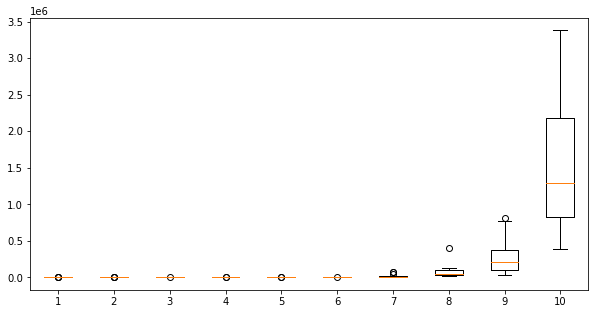

In [5]:
FIG = PLT.figure(figsize=(10,5))
AX  = FIG.add_subplot(111)
AX.boxplot( [ arrExpOut[n]["Last_Days"] for n in range(10) ])